In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) # shut fsolve up for good

In [2]:
def draw(title, x, x_label, y, y_label):

    plt.figure(figsize = (21, 9), dpi = 100)
    plt.title(title, fontsize = 30)

    plt.xlabel(x_label, fontsize = 24)
    plt.xticks(fontsize =  20, ha = "center", va = "top")

    plt.ylabel(y_label, fontsize = 24)
    plt.yticks(fontsize = 20, rotation = 30, ha = "right", va = "top")

    plt.scatter(x, y, s = 5, color = "black")
    plt.plot(x, y, linewidth = 1, color = "black")

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()

In [3]:
p = lambda x : 0
q = lambda x : -10 - np.sin(2 * np.pi * x)
f = lambda x : np.cos(2 * np.pi * x)

x_1 = 0
x_2 = 1

In [30]:
def periodic_tridiagonal(p, q, f, x_1, x_2, N):

    a = lambda h, p_n : 1 + (h * p_n) / 2
    b = lambda h, q_n : h**2 * q_n - 2
    c = lambda h, p_n : 1 - (h * p_n) / 2
    d = lambda h, f_n : h**2 * f_n

    x = np.linspace(x_1, x_2, num = N + 1, endpoint = True)
    h = (x_2 - x_1) / N

    alpha = np.empty(N - 1)
    beta = np.empty(N - 2)
    gamma = np.empty(N - 1)

    b_0 = b(h, q(x[0]))
    alpha[0] = d(h, f(x[0])) / b_0
    beta[0] = -a(h, p(x[0])) / b_0
    gamma[0] = -c(h, p(x[0])) / b_0



    for i in range(1, N - 2):

        c_i = c(h, p(x[i]))
        denom = b(h, q(x[i])) + c_i * beta[i - 1]

        alpha[i] = (d(h, f(x[i])) - c_i * alpha[i - 1]) / denom
        beta[i] = -a(h, p(x[i])) / denom
        gamma[i] = -c_i * gamma[i - 1] / denom



    c_N_min_2 = c(h, p(x[N - 2]))
    denom = b(h, q(x[N - 2])) + c_N_min_2 * beta[N - 3]

    alpha[N - 2] = (d(h, f(x[N - 2])) - c_N_min_2 * alpha[N - 3]) / denom
    gamma[N - 2] = -(a(h, p(x[N - 2])) + c_N_min_2 * gamma[N - 3]) / denom



    nu = np.empty(N)
    mu = np.empty(N)

    c_N_min_1 = c(h, p(x[N - 1]))
    denom = b(h, q(x[N - 1])) + c_N_min_1 * gamma[N - 2]

    nu[N - 1] = (d(h, f(x[N - 1])) - c_N_min_1 * alpha[N - 2]) / denom
    mu[N - 1] = -a(h, p(x[N - 1])) / denom


    nu[N - 2] = alpha[N - 2] + gamma[N - 2] * nu[N - 1]
    mu[N - 2] = gamma[N - 2] * mu[N - 1]


    for i in range(N - 3, -1, -1):
        nu[i] = alpha[i] + beta[i] * nu[i + 1] + gamma[i] * nu[N - 1]
        mu[i] = beta[i] * mu[i + 1] + gamma[i] * mu[N - 1]

    y = np.empty(N + 1)

    y[0] = nu[0] / (1 - mu[0])
    print(y[0])
    for i in range(1, N):
        y[i] = nu[i] + mu[i] * y[0]
        print(y[i])
    y[N] = y[0]

    return x, y

def naive_method(p, q, f, x_1, x_2, N):

    a = lambda h, p_n : 1 + (h * p_n) / 2
    b = lambda h, q_n : h**2 * q_n - 2
    c = lambda h, p_n : 1 - (h * p_n) / 2
    d = lambda h, f_n : h**2 * f_n

    x = np.linspace(x_1, x_2, num = N + 1, endpoint = True)
    h = (x_2 - x_1) / N

    A = np.zeros(shape=(N, N))
    B = np.empty(N)

    A[0, 0] = b(h, q(x[0]))
    A[0, 1] = a(h, p(x[0]))
    A[0, N - 1] = c(h, p(x[0]))
    B[0] = d(h, f(x[0]))

    for i in range(1, N - 1):
        A[i, i - 1] = c(h, p(x[i]))
        A[i, i] = b(h, q(x[i]))
        A[i, i + 1] = a(h, p(x[i]))
        B[i] = d(h, f(x[i]))

    A[N - 1, 0] = a(h, p(x[N - 1]))
    A[N - 1, N - 2] = c(h, p(x[N - 1]))
    A[N - 1, N - 1] = b(h, q(x[N - 1]))
    B[N - 1] = d(h, f(x[N - 1]))

    y = np.linalg.solve(A, B)
    y = np.append(y, y[0])

    return x, y

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_24822/263117992.py:4: SyntaxWarning: invalid escape sequence '\p'
  draw("Periodic tridiagonal solution for $y'' - (10 + \\sin{(2\pi x)})y = \\cos{2\pi x}$", x, "x", y, "y(x)")
/tmp/ipykernel_24822/263117992.py:8: SyntaxWarning: invalid escape sequence '\p'
  draw("Naive solution for $y'' - (10 + \\sin{(2\pi x)})y = \\cos{2\pi x}$", x, "x", y, "y(x)")


-0.020212684634329525
-0.020198930808941397
-0.020165254913840084
-0.020111701318927342
-0.02003833391718648
-0.019945236018121683
-0.019832510222604693
-0.019700278279421064
-0.019548680923822837
-0.019377877698408676
-0.019188046756665487
-0.0189793846495175
-0.018752106095240136
-0.018506443733106077
-0.01824264786114049
-0.017960986158370607
-0.017661743391962657
-0.017345221109645856
-0.017011737317829123
-0.0166616261458214
-0.016295237496570872
-0.015912936684342193
-0.01551510405975366
-0.015102134622598951
-0.014674437622879566
-0.014232436150475513
-0.013776566713882287
-0.013307278808442518
-0.012825034474500287
-0.012330307845905504
-0.01182358468929459
-0.011305361934572388
-0.010776147197018558
-0.010236458291439703
-0.009686822738786426
-0.009127777265652164
-0.008559867297068202
-0.007983646443006778
-0.007399675979001554
-0.006808524321292178
-0.006210766496896961
-0.0056069836090152985
-0.004997762298158795
-0.004383694199407844
-0.003765375396188042
-0.00314340587095

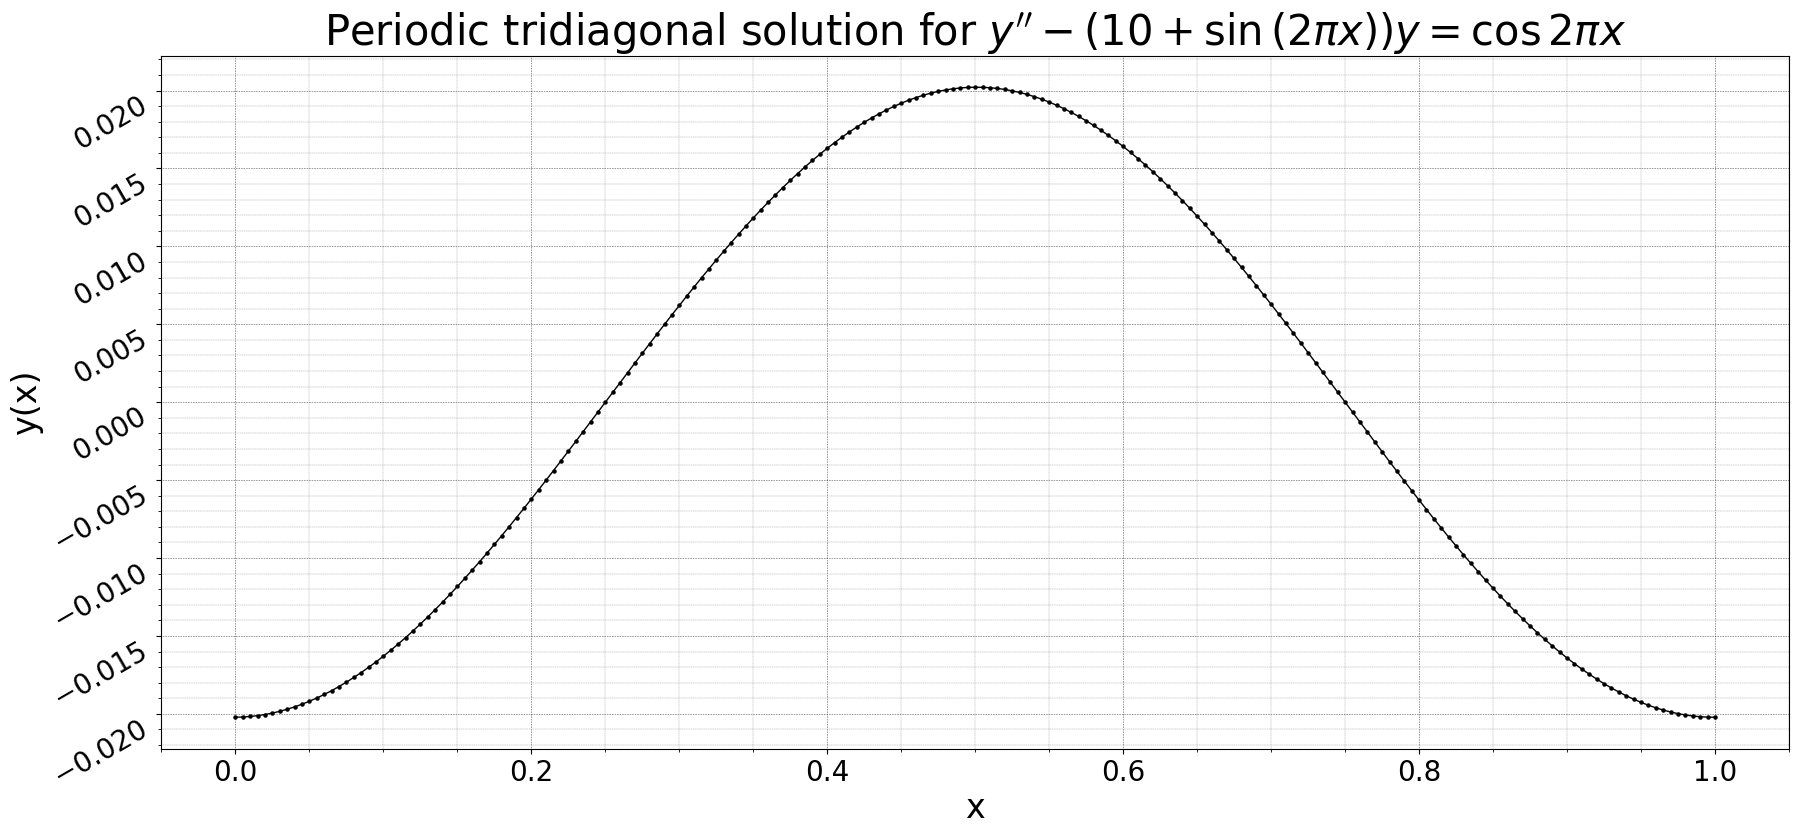

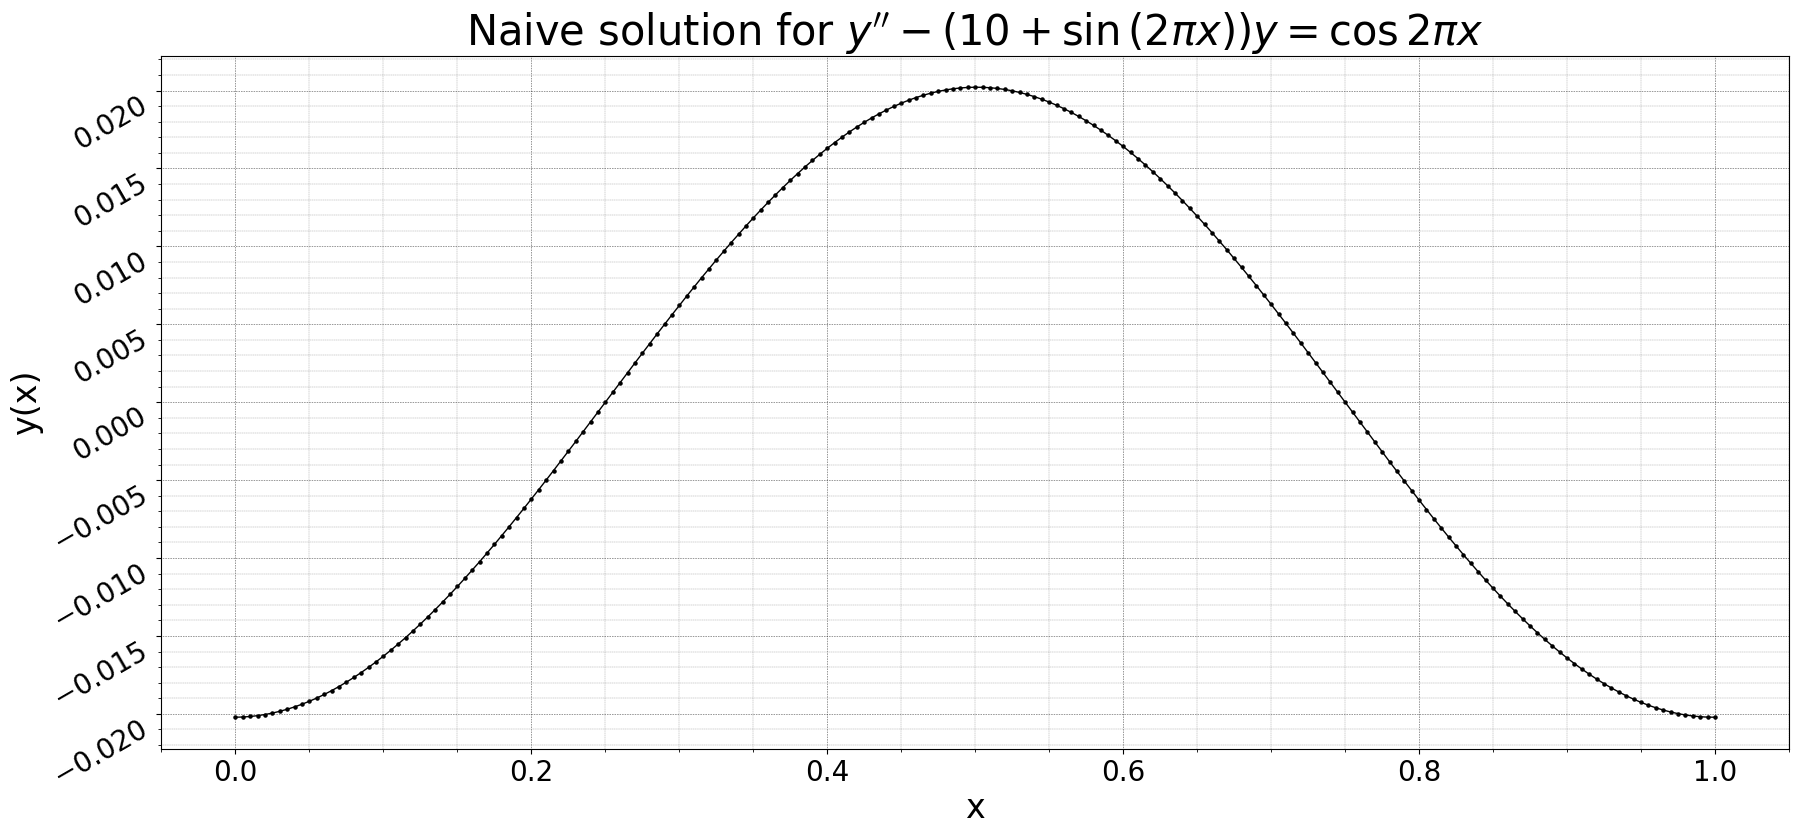

In [31]:
N = 200 # the value was chosen so that h = 0.005
x, y = periodic_tridiagonal(p, q, f, x_1, x_2, N)

draw("Periodic tridiagonal solution for $y'' - (10 + \\sin{(2\pi x)})y = \\cos{2\pi x}$", x, "x", y, "y(x)")

x, y = naive_method(p, q, f, x_1, x_2, N)

draw("Naive solution for $y'' - (10 + \\sin{(2\pi x)})y = \\cos{2\pi x}$", x, "x", y, "y(x)")